# 로지스틱 회귀-cv 데모
- 독립변수의 선형 결합을 이용해 사건의 발생 가능성을 예측하는데 사용되는 통계 기법(Classification)  
- cross-validation 검증 방법: hold out validation, n-fold cv, stratified n-fold cv, leave one out  ect..
# http://hleecaster.com/ml-logistic-regression-example/
# 정규화하기

## 라이브러리 import 및 설정## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing


rcParams['figure.figsize'] = (16, 8)       #그림 사이즈 지정
plt.style.use('fivethirtyeight')           #그림 기본 스타일
pd.set_option('max_columns', 100)          #칼럼 100개 허용
pd.set_option("display.precision", 4)      #소수점 4자리허용
warnings.simplefilter('ignore')            #경고분 무시

## 학습데이터 로드

In [2]:
feature_file = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\feature.csv'
sample_file  = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\sample_submission.csv'
tst_file     = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\testset.csv'
trn_file     = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\trainset.csv'
df= pd.read_csv(feature_file,index_col=0)
print(df.shape)
df.head()                                       #(4280, 32)

(6113, 32)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,188,128,95,114,143,108,88,103,113,85,88,113,87,88,103,87,84,99,104,82,96,100,78,70,79,84,66,70,75,76,63,HI
1,174,112,88,104,119,92,74,79,88,74,67,90,68,71,73,68,71,77,90,67,71,82,65,70,75,89,73,67,71,89,73,PH
2,175,138,106,105,135,109,75,95,113,96,74,112,96,70,87,100,66,83,117,67,88,110,98,67,88,119,98,75,91,110,94,GR
3,176,111,80,106,131,96,76,99,104,85,75,89,75,79,91,75,84,103,109,82,91,96,78,78,91,96,78,82,104,112,85,PH
4,182,144,111,100,151,119,67,106,114,90,76,115,94,68,106,91,68,102,115,71,95,108,88,71,103,113,92,68,107,118,92,EL


## Polynomial Feature 생성

In [3]:
scaler = StandardScaler()
poly = PolynomialFeatures(2)
X = poly.fit_transform(scaler.fit_transform(   df.drop(df.columns[31] , axis=1) )) #종속 제외한 다항피처_독립
feature_names = poly.get_feature_names(df.columns)
feature_names                                                                      #498개 피처(독립변수) 생성

['1',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '0^2',
 '0 1',
 '0 2',
 '0 3',
 '0 4',
 '0 5',
 '0 6',
 '0 7',
 '0 8',
 '0 9',
 '0 10',
 '0 11',
 '0 12',
 '0 13',
 '0 14',
 '0 15',
 '0 16',
 '0 17',
 '0 18',
 '0 19',
 '0 20',
 '0 21',
 '0 22',
 '0 23',
 '0 24',
 '0 25',
 '0 26',
 '0 27',
 '0 28',
 '0 29',
 '0 30',
 '1^2',
 '1 2',
 '1 3',
 '1 4',
 '1 5',
 '1 6',
 '1 7',
 '1 8',
 '1 9',
 '1 10',
 '1 11',
 '1 12',
 '1 13',
 '1 14',
 '1 15',
 '1 16',
 '1 17',
 '1 18',
 '1 19',
 '1 20',
 '1 21',
 '1 22',
 '1 23',
 '1 24',
 '1 25',
 '1 26',
 '1 27',
 '1 28',
 '1 29',
 '1 30',
 '2^2',
 '2 3',
 '2 4',
 '2 5',
 '2 6',
 '2 7',
 '2 8',
 '2 9',
 '2 10',
 '2 11',
 '2 12',
 '2 13',
 '2 14',
 '2 15',
 '2 16',
 '2 17',
 '2 18',
 '2 19',
 '2 20',
 '2 21',
 '2 22',
 '2 23',
 '2 24',
 '2 25',
 '2 26',
 '2 27',
 '2 28',
 '2 29',
 '2 30',
 '3^

In [4]:
df_poly = pd.DataFrame(data=X, columns=feature_names, index=df.index)
df_poly[31] = df['31']
df_poly.head()
df_poly.to_csv('C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\polyfeature.csv')

In [5]:
print(df_poly.shape)                            #(6113, 529)
df_poly.head()

(6113, 529)


,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0^2,0 1,0 2,0 3,0 4,0 5,0 6,0 7,0 8,0 9,0 10,0 11,0 12,0 13,0 14,0 15,0 16,0 17,...,21 27,21 28,21 29,21 30,22^2,22 23,22 24,22 25,22 26,22 27,22 28,22 29,22 30,23^2,23 24,23 25,23 26,23 27,23 28,23 29,23 30,24^2,24 25,24 26,24 27,24 28,24 29,24 30,25^2,25 26,25 27,25 28,25 29,25 30,26^2,26 27,26 28,26 29,26 30,27^2,27 28,27 29,27 30,28^2,28 29,28 30,29^2,29 30,30^2,31
0,1.0,1.3649,0.5248,0.1290,1.0913,0.8616,0.5333,1.4146,0.8781,0.8512,0.1382,1.3729,0.8232,0.2303,1.3975,0.8645,0.2310,1.1224,0.7028,0.3017,0.9427,0.5521,0.0448,-0.2479,0.0765,-0.1833,-0.9072,-0.8754,0.0928,-0.3467,-1.3754,-1.0265,1.8629,0.7163,0.1761,1.4895,1.1760,0.7278,1.9308,1.1985,1.1618,0.1886,1.8739,1.1236,0.3143,1.9074,1.1800,0.3153,1.5320,0.9592,...,0.0042,-0.0155,-0.0616,-0.0460,0.0615,-0.0190,0.0454,0.2249,0.2170,-0.0230,0.0860,0.3410,0.2545,0.0058,-0.0140,-0.0694,-0.0669,0.0071,-0.0265,-0.1052,-0.0785,0.0336,0.1663,0.1605,-0.0170,0.0636,0.2521,0.1881,0.8231,0.7942,-0.0842,0.3146,1.2478,0.9313,0.7664,-0.0812,0.3035,1.2041,0.8986,0.0086,-0.0322,-0.1276,-0.0952,0.1202,0.4769,0.3559,1.8917,1.4118,1.0537,HI
1,1.0,0.3374,-0.4378,-0.2422,0.3552,-0.1868,-0.4282,0.3759,-0.1707,-0.6536,-0.4426,-0.1685,-0.5607,-0.7749,0.1435,-0.4448,-0.7681,0.1580,-0.2578,-0.5361,-0.1607,-0.5448,-1.0411,-0.9337,0.0765,-0.3583,-0.6076,-0.5076,-0.1306,-0.5218,-0.5971,-0.5013,0.1139,-0.1477,-0.0817,0.1199,-0.0630,-0.1445,0.1268,-0.0576,-0.2205,-0.1493,-0.0568,-0.1892,-0.2615,0.0484,-0.1501,-0.2592,0.0533,-0.0870,...,0.1359,0.5432,0.6216,0.5219,0.8717,-0.0714,0.3345,0.5673,0.4739,0.1219,0.4872,0.5575,0.4680,0.0058,-0.0274,-0.0465,-0.0388,-0.0100,-0.0399,-0.0457,-0.0383,0.1284,0.2177,0.1819,0.0468,0.1870,0.2139,0.1796,0.3691,0.3084,0.0793,0.3170,0.3628,0.3046,0.2577,0.0663,0.2649,0.3031,0.2545,0.0171,0.0681,0.0780,0.0655,0.2723,0.3116,0.2616,0.3566,0.2993,0.2513,PH
2,1.0,0.4108,1.1265,0.7124,0.4288,0.5121,0.5933,0.4501,0.5285,0.8512,0.7190,0.3453,0.7631,0.7064,0.0698,0.1662,0.9146,-0.2129,0.0042,1.0798,-0.1607,0.2011,0.6481,0.8071,-0.1456,0.2104,1.1904,0.8060,0.4650,0.3537,0.6601,0.6017,0.1688,0.4628,0.2927,0.1762,0.2104,0.2438,0.1849,0.2171,0.3497,0.2954,0.1419,0.3135,0.2902,0.0287,0.0683,0.3757,-0.0875,0.0017,...,0.3013,0.2292,0.4278,0.3899,0.6514,-0.1175,0.1698,0.9608,0.6505,0.3753,0.2854,0.5327,0.4856,0.0212,-0.0306,-0.1733,-0.1173,-0.0677,-0.0515,-0.0961,-0.0876,0.0443,0.2505,0.1696,0.0978,0.0744,0.1389,0.1266,1.4172,0.9595,0.5536,0.4210,0.7858,0.7162,0.6496,0.3748,0.2850,0.5320,0.4849,0.2162,0.1644,0.3069,0.2798,0.1251,0.2334,0.2128,0.4357,0.3971,0.3620,GR
3,1.0,0.4842,-0.4979,-0.6665,0.5024,0.3374,-0.1879,0.5243,0.7033,0.3095,0.1382,0.4187,-0.6208,-0.4046,0.7336,0.3408,-0.4000,1.1224,0.8774,0.6010,0.9427,0.3327,-0.1965,-0.2479,0.6686,0.3416,-0.1880,-0.2449,0.9861,0.9227,0.7798,0.1290,0.2344,-0.2411,-0.3227,0.2433,0.1634,-0.0910,0.2538,0.3406,0.1499,0.0669,0.2027,-0.3006,-0.1959,0.3552,0.1650,-0.1937,0.5435,0.4249,...,-0.1938,-0.1813,-0.1532,-0.0253,0.0615,-0.1657,-0.0847,0.0466,0.0607,-0.2445,-0.2287,-0.1933,-0.0320,0.4470,0.2284,-0.1257,-0.1637,0.6593,0.6169,0.5214,0.0862,0.1167,-0.0642,-0.0837,0.3369,0.3152,0.2664,0.0441,0.0354,0.0460,-0.1854,-0.1735,-0.1466,-0.0243,0.0600,-0.2415,-0.2260,-0.1910,-0.0316,0.9724,0.9099,0.7690,0.1272,0.8514,0.7195,0.1190,0.6081,0.1006,0.0166,PH
4,1.0,0.9245,1.4874,0.9776,0.0608,1.2111,1.1943,-0.1435,1.0092,0.9114,0.4022,0.4921,0.9436,0.6006,-0.0778,0.9955,0.4414,-0.0645,0.8338,0.9601,0.1335,0.5082,0.5274,0.2796,0.1505,0.8666,0.8308,0.4907,-0.0561,1.0540,1.1390,0.4966,0.8548,1.3752,0.9038,0.0562,1.1197,1.1041,-0.1327,0.9331,0.8426,0.3718,0.4550,0.8724,0.5553,-0.0719,0.9204,0.4081,-0.0597,0.7709,...,-0.0296,0.5559,0.6007,0.2619,0.0782,0.0421,0.2423,0.2323,0.1372,-0.0157,0.2947,0.3185,0.1389,0.0226,0.1304,0.1250,0.0738,-0.0084,0.1586,0.1714,0.0747,0.7509,0.7200,0.4253,-0.0486,0.9134,0.9870,0.4304,0.6903,0.4077,-0.0466,0.8757,0.9463,0.4126,0.2408,-0.0275,0.5172,0

In [6]:
del df_poly, df

In [7]:
df = pd.read_csv('C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\polyfeature.csv', index_col=0)
print(df.shape)                                #(6113, 529)
df.head()

(6113, 529)


,1,0,1.1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0^2,0 1,0 2,0 3,0 4,0 5,0 6,0 7,0 8,0 9,0 10,0 11,0 12,0 13,0 14,0 15,0 16,0 17,...,21 27,21 28,21 29,21 30,22^2,22 23,22 24,22 25,22 26,22 27,22 28,22 29,22 30,23^2,23 24,23 25,23 26,23 27,23 28,23 29,23 30,24^2,24 25,24 26,24 27,24 28,24 29,24 30,25^2,25 26,25 27,25 28,25 29,25 30,26^2,26 27,26 28,26 29,26 30,27^2,27 28,27 29,27 30,28^2,28 29,28 30,29^2,29 30,30^2,31
0,1.0,1.3649,0.5248,0.1290,1.0913,0.8616,0.5333,1.4146,0.8781,0.8512,0.1382,1.3729,0.8232,0.2303,1.3975,0.8645,0.2310,1.1224,0.7028,0.3017,0.9427,0.5521,0.0448,-0.2479,0.0765,-0.1833,-0.9072,-0.8754,0.0928,-0.3467,-1.3754,-1.0265,1.8629,0.7163,0.1761,1.4895,1.1760,0.7278,1.9308,1.1985,1.1618,0.1886,1.8739,1.1236,0.3143,1.9074,1.1800,0.3153,1.5320,0.9592,...,0.0042,-0.0155,-0.0616,-0.0460,0.0615,-0.0190,0.0454,0.2249,0.2170,-0.0230,0.0860,0.3410,0.2545,0.0058,-0.0140,-0.0694,-0.0669,0.0071,-0.0265,-0.1052,-0.0785,0.0336,0.1663,0.1605,-0.0170,0.0636,0.2521,0.1881,0.8231,0.7942,-0.0842,0.3146,1.2478,0.9313,0.7664,-0.0812,0.3035,1.2041,0.8986,0.0086,-0.0322,-0.1276,-0.0952,0.1202,0.4769,0.3559,1.8917,1.4118,1.0537,HI
1,1.0,0.3374,-0.4378,-0.2422,0.3552,-0.1868,-0.4282,0.3759,-0.1707,-0.6536,-0.4426,-0.1685,-0.5607,-0.7749,0.1435,-0.4448,-0.7681,0.1580,-0.2578,-0.5361,-0.1607,-0.5448,-1.0411,-0.9337,0.0765,-0.3583,-0.6076,-0.5076,-0.1306,-0.5218,-0.5971,-0.5013,0.1139,-0.1477,-0.0817,0.1199,-0.0630,-0.1445,0.1268,-0.0576,-0.2205,-0.1493,-0.0568,-0.1892,-0.2615,0.0484,-0.1501,-0.2592,0.0533,-0.0870,...,0.1359,0.5432,0.6216,0.5219,0.8717,-0.0714,0.3345,0.5673,0.4739,0.1219,0.4872,0.5575,0.4680,0.0058,-0.0274,-0.0465,-0.0388,-0.0100,-0.0399,-0.0457,-0.0383,0.1284,0.2177,0.1819,0.0468,0.1870,0.2139,0.1796,0.3691,0.3084,0.0793,0.3170,0.3628,0.3046,0.2577,0.0663,0.2649,0.3031,0.2545,0.0171,0.0681,0.0780,0.0655,0.2723,0.3116,0.2616,0.3566,0.2993,0.2513,PH
2,1.0,0.4108,1.1265,0.7124,0.4288,0.5121,0.5933,0.4501,0.5285,0.8512,0.7190,0.3453,0.7631,0.7064,0.0698,0.1662,0.9146,-0.2129,0.0042,1.0798,-0.1607,0.2011,0.6481,0.8071,-0.1456,0.2104,1.1904,0.8060,0.4650,0.3537,0.6601,0.6017,0.1688,0.4628,0.2927,0.1762,0.2104,0.2438,0.1849,0.2171,0.3497,0.2954,0.1419,0.3135,0.2902,0.0287,0.0683,0.3757,-0.0875,0.0017,...,0.3013,0.2292,0.4278,0.3899,0.6514,-0.1175,0.1698,0.9608,0.6505,0.3753,0.2854,0.5327,0.4856,0.0212,-0.0306,-0.1733,-0.1173,-0.0677,-0.0515,-0.0961,-0.0876,0.0443,0.2505,0.1696,0.0978,0.0744,0.1389,0.1266,1.4172,0.9595,0.5536,0.4210,0.7858,0.7162,0.6496,0.3748,0.2850,0.5320,0.4849,0.2162,0.1644,0.3069,0.2798,0.1251,0.2334,0.2128,0.4357,0.3971,0.3620,GR
3,1.0,0.4842,-0.4979,-0.6665,0.5024,0.3374,-0.1879,0.5243,0.7033,0.3095,0.1382,0.4187,-0.6208,-0.4046,0.7336,0.3408,-0.4000,1.1224,0.8774,0.6010,0.9427,0.3327,-0.1965,-0.2479,0.6686,0.3416,-0.1880,-0.2449,0.9861,0.9227,0.7798,0.1290,0.2344,-0.2411,-0.3227,0.2433,0.1634,-0.0910,0.2538,0.3406,0.1499,0.0669,0.2027,-0.3006,-0.1959,0.3552,0.1650,-0.1937,0.5435,0.4249,...,-0.1938,-0.1813,-0.1532,-0.0253,0.0615,-0.1657,-0.0847,0.0466,0.0607,-0.2445,-0.2287,-0.1933,-0.0320,0.4470,0.2284,-0.1257,-0.1637,0.6593,0.6169,0.5214,0.0862,0.1167,-0.0642,-0.0837,0.3369,0.3152,0.2664,0.0441,0.0354,0.0460,-0.1854,-0.1735,-0.1466,-0.0243,0.0600,-0.2415,-0.2260,-0.1910,-0.0316,0.9724,0.9099,0.7690,0.1272,0.8514,0.7195,0.1190,0.6081,0.1006,0.0166,PH
4,1.0,0.9245,1.4874,0.9776,0.0608,1.2111,1.1943,-0.1435,1.0092,0.9114,0.4022,0.4921,0.9436,0.6006,-0.0778,0.9955,0.4414,-0.0645,0.8338,0.9601,0.1335,0.5082,0.5274,0.2796,0.1505,0.8666,0.8308,0.4907,-0.0561,1.0540,1.1390,0.4966,0.8548,1.3752,0.9038,0.0562,1.1197,1.1041,-0.1327,0.9331,0.8426,0.3718,0.4550,0.8724,0.5553,-0.0719,0.9204,0.4081,-0.0597,0.7709,...,-0.0296,0.5559,0.6007,0.2619,0.0782,0.0421,0.2423,0.2323,0.1372,-0.0157,0.2947,0.3185,0.1389,0.0226,0.1304,0.1250,0.0738,-0.0084,0.1586,0.1714,0.0747,0.7509,0.7200,0.4253,-0.0486,0.9134,0.9870,0.4304,0.6903,0.4077,-0.0466,0.8757,0.9463,0.4126,0.2408,-0.0275,0.5172

In [8]:
#(6113, 529) 종속(31번) / 독립s
y = df['31'].values[:4280]                       #학습_종속 4280개
df.drop('31', axis=1, inplace=True)              #독립을 위한 종속 제거
trn = df.iloc[:4280].values                      #학습데이터_독립 4280개
tst = df.iloc[4280:].values                      #시험데이터_독립 1883개
#feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)             #(4280,) (4280, 528) (1833, 528)

(4280,) (4280, 528) (1833, 528)


In [9]:
seed=150
kfold=10

## Stratified K-Fold Cross Validation
*Stratified N-Fold CV: N-Fold CV에서 각각의 폴드에서 종속변수의 분포가 동일하도록 폴드를 나누는 방식.
현재 사용하는 데이터처럼 분류학습에서 종속변수의 범주의 분포가 균일하지 않을 때 사용된다.

In [10]:
cv = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=seed)

### [범주형 > 수치형 변환_종속변수]

In [11]:
le = preprocessing.LabelEncoder()
label_str=y
label_int=le.fit_transform(label_str).astype('int')
#target=le.inverse_transform(label_int)
#target

## Logistic Regression 모델 학습

In [12]:
p_val = np.zeros((trn.shape[0], 6))
p_tst = np.zeros((tst.shape[0], 6))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=seed)
    clf.fit(trn[i_trn],label_int[i_trn])
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / kfold

training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4
training model for CV #5
training model for CV #6
training model for CV #7
training model for CV #8
training model for CV #9
training model for CV #10


** ( 범주값 출력: clf.pedict(), 확률값출력: clf.predict_proba() ) **

In [13]:
print(f'{accuracy_score(label_int, np.argmax(p_val, axis=1)) * 100:.4f}%')

88.9252%


## Simple way Cross Validation

In [15]:
scores = cross_val_score(clf, trn,y, cv=5) # model, train, target, cross validation
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.4f}%'.format(scores.mean()*100))
#88.2% 88.6682%

cross-val-score 
[0.88668224 0.90186916 0.88200935 0.875      0.88084112]
cross-val-score.mean 
88.5280%


In [16]:
print(p_val.shape, p_tst.shape)

(4280, 6) (1833, 6)


### [stacking 사용을 위해 p_val,p_tst 저장]

In [17]:
val_dir = Path('C:\\Users\\USER\\Desktop\\Dataset\\val')
tst_dir = Path('C:\\Users\\USER\\Desktop\\Dataset\\tst')
name = 'lrcvPolyfeature'
model_name = f'{name}'
p_val_file = val_dir / f'{name}.val.csv'
p_tst_file = tst_dir / f'{name}.tst.csv'

In [18]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=', ')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=', ')

## 피처 중요도 시각화

In [19]:
clf.coef_.shape

(6, 528)

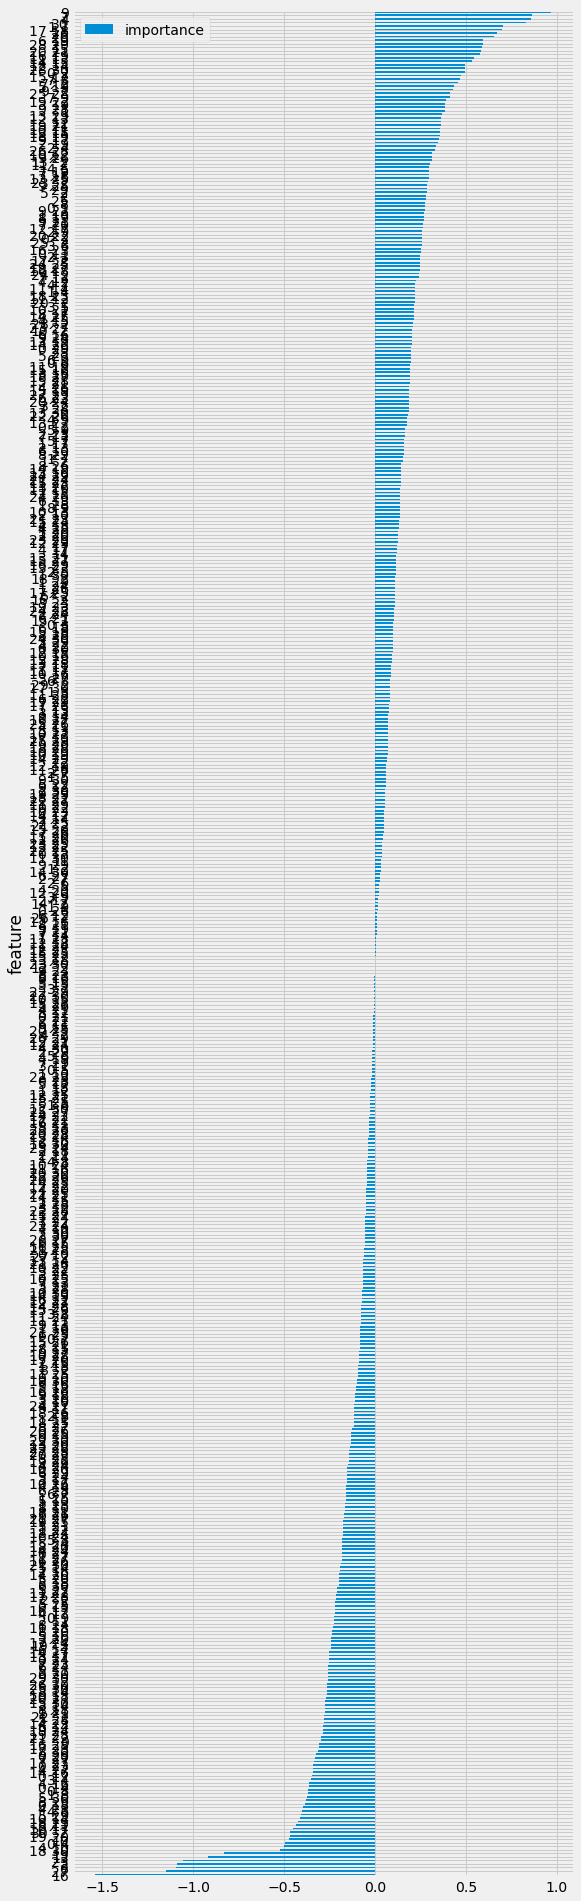

In [20]:
imp = pd.DataFrame({'feature': df.columns, 'importance': clf.coef_[1, :].T})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh', figsize=(8, 32))

### [수치형 > 범주형 변환_종속변수]

In [21]:
pt=np.zeros(shape=(1833,))
pt = pt.astype(np.int64)
for x in range(0,1833):
    pt[x] = np.argmax(p_tst[x,:])
target=le.inverse_transform(pt)
target

array(['HI', 'EL', 'HI', ..., 'PH', 'PH', 'HI'], dtype=object)

## 제출 파일 생성

In [22]:
#sub = pd.read_csv(sample_file)
#sub['class']
sub = pd.read_csv(sample_file)
sub['class'] = p_tst
sub.to_csv('C:\\Users\\USER\\Desktop\\Dataset\\sub\\lrcv-sub.csv',index=False,header=False)